#Step: 1 Pre-Processing

#1.1.Import all required libraies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

#1.2.Load dataset file into google colab repository [ Dataset size is very huge so it takes more time to load and for data processing]

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Reviews.csv to Reviews.csv


In [3]:
import io
#df = pd.read_csv(io.BytesIO(uploaded['Reviews.csv']), names=["ProductId","UserId","Score","Summary","Text"])
df = pd.read_csv(io.BytesIO(uploaded['Reviews.csv']))
print ("The shape of the  data is (row, column):"+ str(df.shape))
print (df.info())
print(df.head())

The shape of the  data is (row, column):(568454, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   

# 2.Expore the data for further processing

In [4]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

#Step 2.1.Remove all null values in the dataset

In [5]:
df=df.dropna()

In [ ]:
df.info()

In [6]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

# After data cleaning  , data does not have any null values.

# Concatenating review text and summary and drop columns which are not adding values

In [7]:
df['Customer Reviews']=df['Summary']+df['Text']


#Step 2.2 formate the date column

In [8]:
from datetime import datetime

df["Review date"]  = [datetime.fromtimestamp(x) for x in df["Time"]]

df["Review date"]=pd.to_datetime(df["Review date"])
df['Year'] = (df["Review date"].dt.year).astype(int)
df['Month'] = (df["Review date"].dt.month).astype(int)

df=df.drop(['Summary', 'Text'], axis=1)
df=df.drop(['Id','HelpfulnessNumerator', 'HelpfulnessDenominator','Time'], axis=1)
df.head()



,ProductId,UserId,ProfileName,Score,Customer Reviews,Review date,Year,Month
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog FoodI have bought several of ...,2011-04-27,2011,4
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as AdvertisedProduct arrived labeled as Ju...,2012-09-07,2012,9
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it allThis is a confection that...",2008-08-18,2008,8
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough MedicineIf you are looking for the secre...,2011-06-13,2011,6
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffyGreat taffy at a great price. Ther...,2012-10-21,2012,10


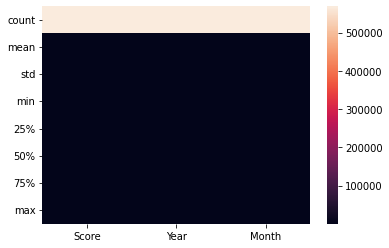

In [9]:
sns.heatmap(df.describe())

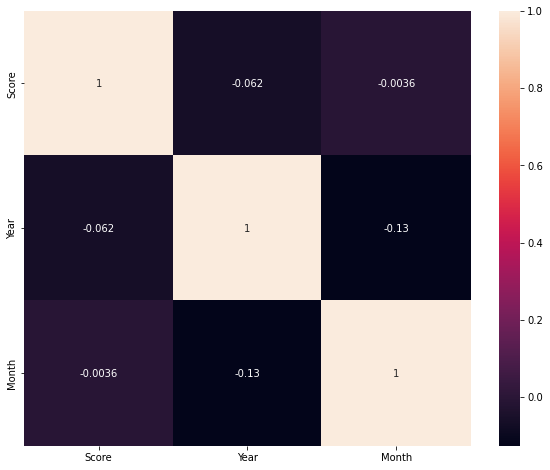

In [10]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(df.corr(),annot=True, ax=ax)

#Step :3.Exploratory Data Analysis (EDA)

# Step : 3.1.Distribution of Product Ratings

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64


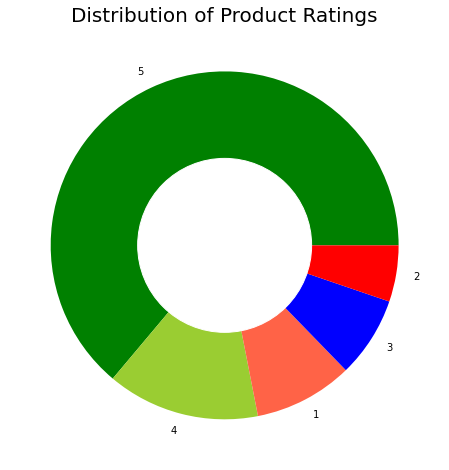

In [11]:
ratings = df["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values
print(ratings)

custom_colors = ["green", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Product Ratings", fontsize=20)
plt.show()

#According to the pie chart plotted on column fields, more than half of people rated products they bought from e-commerce site ,with 5 stars, which is good. Let's add three more columns to this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the customer reviews mentioned in the Text column of the dataset:

#Step : 3.1 Creating 'sentiment' columns

In [12]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
sentiments = SentimentIntensityAnalyzer()

In [14]:
cvec = CountVectorizer(lowercase=True, strip_accents="ascii",
                       ngram_range=(1, 1), stop_words="english", min_df=10)
cvec.fit(df["Customer Reviews"])
vectorizedData = cvec.transform(df["Customer Reviews"])
print(vectorizedData)


  (0, 2142)	1
  (0, 3673)	2
  (0, 4320)	1
  (0, 5240)	1
  (0, 9921)	2
  (0, 12227)	1
  (0, 12705)	1
  (0, 12725)	1
  (0, 13884)	2
  (0, 17599)	1
  (0, 18072)	1
  (0, 18369)	1
  (0, 19223)	1
  (0, 24051)	1
  (0, 24077)	2
  (0, 24119)	1
  (0, 24592)	2
  (0, 28134)	1
  (0, 29273)	1
  (0, 33245)	1
  (1, 1128)	1
  (1, 2284)	1
  (1, 11113)	1
  (1, 16454)	1
  (1, 17122)	2
  :	:
  (568409, 13884)	1
  (568409, 14364)	1
  (568409, 18446)	1
  (568409, 18485)	1
  (568409, 20855)	1
  (568409, 23578)	1
  (568409, 25934)	1
  (568409, 25936)	1
  (568409, 30137)	1
  (568409, 31720)	2
  (568409, 31819)	1
  (568409, 31844)	1
  (568409, 31868)	1
  (568409, 33754)	1
  (568410, 1290)	1
  (568410, 5701)	1
  (568410, 13492)	1
  (568410, 14204)	1
  (568410, 15389)	1
  (568410, 24077)	1
  (568410, 24900)	1
  (568410, 26699)	1
  (568410, 30171)	1
  (568410, 32767)	1
  (568410, 33173)	1


In [15]:
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Customer Reviews"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Customer Reviews"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Customer Reviews"]]

#print(f'The % of positive sentiment in "{sentence}" is {round(pos*100,2)} %') 
print(df.head("Positive"))

    ProductId          UserId                      ProfileName  Score  \
0  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian      5   
1  B00813GRG4  A1D87F6ZCVE5NK                           dll pa      1   
2  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"      4   
3  B000UA0QIQ  A395BORC6FGVXV                             Karl      2   
4  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"      5   

                                    Customer Reviews Review date  Year  Month  \
0  Good Quality Dog FoodI have bought several of ...  2011-04-27  2011      4   
1  Not as AdvertisedProduct arrived labeled as Ju...  2012-09-07  2012      9   
2  "Delight" says it allThis is a confection that...  2008-08-18  2008      8   
3  Cough MedicineIf you are looking for the secre...  2011-06-13  2011      6   
4  Great taffyGreat taffy at a great price.  Ther...  2012-10-21  2012     10   

   Positive  Negative  Neutral  
0     0.323     0.000    0.677  
1     0.

In [25]:
df1= df[['Customer Reviews','Positive','Negative','Neutral']]
df1["Positive"] = round(df1["Positive"]*100,2)
df1["Negative"] = round(df1["Negative"]*100,2)
df1["Neutral"] = round(df1["Neutral"]*100,2)
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Customer Reviews,Positive,Negative,Neutral
0,Good Quality Dog FoodI have bought several of ...,32.3,0.0,67.7
1,Not as AdvertisedProduct arrived labeled as Ju...,0.0,13.1,86.9
2,"""Delight"" says it allThis is a confection that...",15.1,8.8,76.1
3,Cough MedicineIf you are looking for the secre...,0.0,0.0,100.0
4,Great taffyGreat taffy at a great price. Ther...,43.5,0.0,56.5


In [16]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)


Neutral 🙂 


# So, most people are neutral when submitting their experiences with the products they have purchased from shopping ecommerce site. Now let’s see the total of all sentiment scores:


In [17]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)


Positive:  116310.17400000285
Negative:  24263.483999999244
Neutral:  427837.0169999829


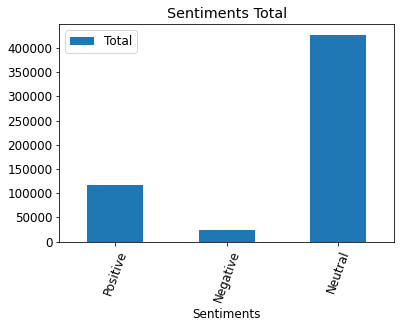

In [18]:

data = {"Sentiments":["Positive", "Negative", "Neutral"],

        "Total":[x,y,z]

        };

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data);

 

# Draw a vertical bar chart

dataFrame.plot.bar(x="Sentiments", y="Total", rot=70, title="Sentiments Total");

plt.show(block=True);

# So we can say that most of the reviews of the products available on ecommerce site are positive, as the total sentiment scores of Positive and Neural are much higher than Negative scores.


In [19]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE) 
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
df['sentiment_score'] = df['Score'].map(sentiment_score)
df['sentiment'] = df['sentiment_score'].map(sentiment)

df.head()

,ProductId,UserId,ProfileName,Score,Customer Reviews,Review date,Year,Month,Positive,Negative,Neutral,sentiment_score,sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog FoodI have bought several of ...,2011-04-27,2011,4,0.323,0.000,0.677,1,POSITIVE
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as AdvertisedProduct arrived labeled as Ju...,2012-09-07,2012,9,0.000,0.131,0.869,0,NEGATIVE
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it allThis is a confection that...",2008-08-18,2008,8,0.151,0.088,0.761,1,POSITIVE
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough MedicineIf you are looking for the secre...,2011-06-13,2011,6,0.000,0.000,1.000,0,NEGATIVE
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffyGreat taffy at a great price. Ther...,2012-10-21,2012,10,0.435,0.000,0.565,1,POSITIVE


In [ ]:
df['sentiment_score'].value_counts()

#Step :3.2 derive the sentiment 

In [ ]:
plt.figure(figsize = (8, 8))

labels = ['POSITIVE','NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(df['sentiment_score'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [ ]:
#Processing of ProductId
#Sorting data according to ProductId in ascending order
sorted_data=df.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#sorted_data.head() # printing sorted data
# To check the duplications in raw data
dupli=sorted_data[sorted_data.duplicated(["UserId","ProfileName","Customer Reviews"])]
print('-----------------------------------------')
print('-----------------------------------------')
print('            Duplicated data ')
print('-----------------------------------------')
print('-----------------------------------------')
print( str(dupli.head(5)))
print('-----------------------------------------')
print('-----------------------------------------')
# Remove Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Customer Reviews"}, keep='first', inplace=False)
final.shape
#Checking to see how much % of data still remains
(final['UserId'].size*1.0)/(df['UserId'].size*1.0)*100
#final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
#Before starting the next phase of preprocessing lets see the number of entries left
print('-----------------------------------------')
print('-----------------------------------------')
print('Final data shape : ' +str(final.shape))
print('-----------------------------------------')
print('-----------------------------------------')

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

In [ ]:

labels = ['POSITIVE','NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(df['sentiment_score'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

# observations
The positive reviews is greater than negative reviews.It makes data imbalanced.
From the bar plot ,it is  very evident that given dataset is imbanced one.


In [26]:
#Creating a copy 
clean_review=df.copy()

In [27]:
import nltk
import string
from nltk.corpus import stopwords
import pickle
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [29]:
clean_review["Customer Reviews"]=clean_review["Customer Reviews"].apply(lambda x:review_cleaning(x))
clean_review.head()

,ProductId,UserId,ProfileName,Score,Customer Reviews,Review date,Year,Month,Positive,Negative,Neutral,sentiment_score,sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,good quality dog foodi have bought several of ...,2011-04-27,2011,4,0.323,0.000,0.677,1,POSITIVE
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,not as advertisedproduct arrived labeled as ju...,2012-09-07,2012,9,0.000,0.131,0.869,0,NEGATIVE
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,delight says it allthis is a confection that h...,2008-08-18,2008,8,0.151,0.088,0.761,1,POSITIVE
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2,cough medicineif you are looking for the secre...,2011-06-13,2011,6,0.000,0.000,1.000,0,NEGATIVE
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,great taffygreat taffy at a great price there...,2012-10-21,2012,10,0.435,0.000,0.565,1,POSITIVE


#3.3. Year VS Sentiment insights

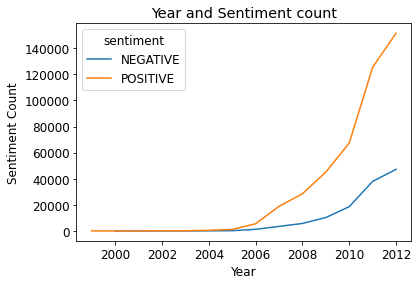

In [30]:
clean_review.groupby(['Year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment Count')
plt.show()

#Observation : From the plot we can clearly see the rise in positive reviews from 2010. Reaching its peak around 2012 ,Negative and neutral reviews are very low as compared to the positive reviews. 

#3.4. Month VS Sentiment insights

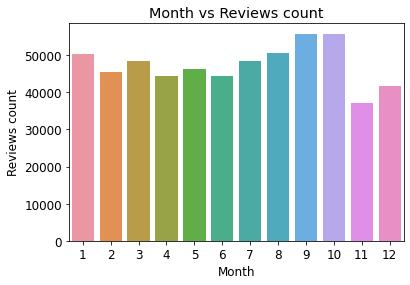

In [31]:
#Creating a dataframe
day=pd.DataFrame(clean_review.groupby('Month')['Customer Reviews'].count()).reset_index()
day['Month']=day['Month'].astype('int64')
day.sort_values(by=['Month'])

#Plotting the graph
sns.barplot(x="Month", y="Customer Reviews", data=day)
plt.title('Month vs Reviews count')
plt.xlabel('Month')
plt.ylabel('Reviews count')
plt.show()

# The customer review counts are more or less uniformly distributed.There isn't much variance between the days. But there is a drop at the end of month. 

# Step 3.5.Let's add few more features to get better insights

Polarity: Have used Textblob for for figuring out the rate of sentiment . It is between [-1,1] where -1 is negative and 1 is positive polarity

Review length: length of the review which includes each letters and spaces

Word length: This measures how many words are there in review

In [32]:
from textblob import TextBlob
clean_review['polarity'] = clean_review['Customer Reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
clean_review['review_len'] = clean_review['Customer Reviews'].astype(str).apply(len)
clean_review['word_count'] = clean_review['Customer Reviews'].apply(lambda x: len(str(x).split()))
clean_review.head()

,ProductId,UserId,ProfileName,Score,Customer Reviews,Review date,Year,Month,Positive,Negative,Neutral,sentiment_score,sentiment,polarity,review_len,word_count
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,good quality dog foodi have bought several of ...,2011-04-27,2011,4,0.323,0.000,0.677,1,POSITIVE,0.485714,281,51
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,not as advertisedproduct arrived labeled as ju...,2012-09-07,2012,9,0.000,0.131,0.869,0,NEGATIVE,-0.033333,200,33
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,delight says it allthis is a confection that h...,2008-08-18,2008,8,0.151,0.088,0.761,1,POSITIVE,0.133571,510,95
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2,cough medicineif you are looking for the secre...,2011-06-13,2011,6,0.000,0.000,1.000,0,NEGATIVE,0.166667,228,42
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,great taffygreat taffy at a great price there...,2012-10-21,2012,10,0.435,0.000,0.565,1,POSITIVE,0.483333,146,28


In [35]:
df2= clean_review[['Customer Reviews','review_len','polarity','word_count']]
df2.head()

,Customer Reviews,review_len,polarity,word_count
0,good quality dog foodi have bought several of ...,281,0.485714,51
1,not as advertisedproduct arrived labeled as ju...,200,-0.033333,33
2,delight says it allthis is a confection that h...,510,0.133571,95
3,cough medicineif you are looking for the secre...,228,0.166667,42
4,great taffygreat taffy at a great price there...,146,0.483333,28


# Step .3.6.Sentiment polarity distribution
**Let's look at our polarity distribution**

In [36]:
#!pip install statsmodels --upgrade
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#Step : 3.6.1.Polarity Distribution  [It is between [-1,1] where -1 is negative and 1 is positive polarity]

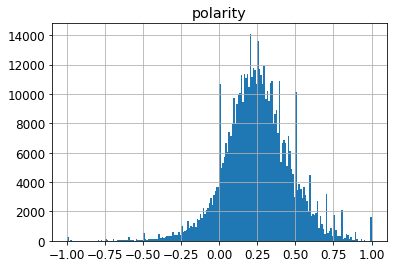

In [37]:
clean_review.hist(column='polarity',bins=200);

# Observation : 
1.Have a lot of positive polarities compared to the negative polarities
2.This polarity distributions assures the number of positive reviews we had
3.I can say that this polarity is a normally distributed but not standard normal

#Step : 3.6.2 Review Text Length Distribution

# This is distribution where length of the review which includes each letters and spaces.

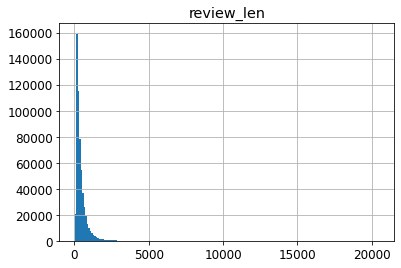

In [38]:
clean_review.hist(column='review_len',bins=200);

# From the above plot , sound like it has right skewed distribution where most of the lengths falls between 0-2000

#Step 3.26.3 Review Text Word Count Distribution
Let's check out the word count of review text

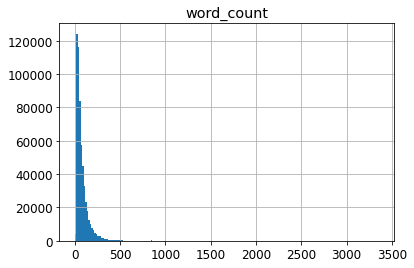

In [39]:
clean_review.hist(column='word_count',bins=200);

# From the above plot , sound like right skewed distribution with most of the words falling between 0-300 in a a review

# Step : 4 N-gram analysis - it is being used to analyse the text, based on it's sentiment

#Step 4.1 - Monogram analysis - Let's plot most frequent one word in reviews based on sentiments


In [40]:
from wordcloud import WordCloud,STOPWORDS
from plotly import tools
from plotly.offline import iplot
%matplotlib inline
import plotly.graph_objs as go

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]


In [41]:
#Filtering data
review_pos = clean_review[clean_review["sentiment"]=='POSITIVE'].dropna()
review_neu = clean_review[clean_review["sentiment"]=='NEUTRAL'].dropna()
review_neg = clean_review[clean_review["sentiment"]=='NEGATIVE'].dropna()


# Step : 4.1.1.Frequent words of positive reviews

Text(0, 0.5, 'word_count')

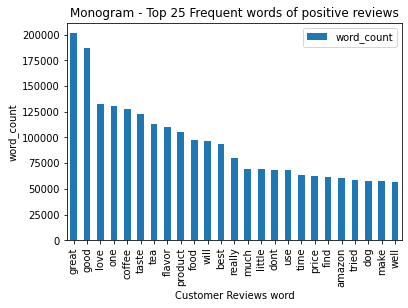

In [42]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["Customer Reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["Customer Reviews", "word_count"]
#print(fd_sorted.head(25))
fd_sorted.head(25).plot(x="Customer Reviews", y="word_count",kind="bar")
plt.title("Monogram - Top 25 Frequent words of positive reviews")
plt.xlabel("Customer Reviews word")
plt.ylabel("word_count")


# Step : 4.1.2.Frequent words of negative  reviews

Text(0, 0.5, 'word_count')

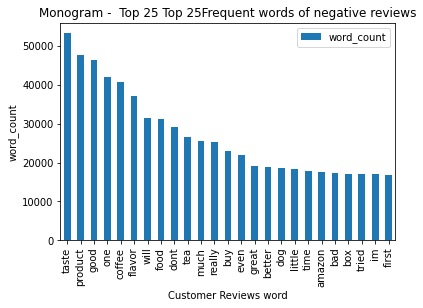

In [43]:
## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Customer Reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["Customer Reviews", "word_count"]
#print(fd_sorted.head(25))
fd_sorted.head(25).plot(x="Customer Reviews", y="word_count",kind="bar")
plt.title("Monogram -  Top 25 Top 25Frequent words of negative reviews")
plt.xlabel("Customer Reviews word")
plt.ylabel("word_count")


#Step 4.2 - Bigram analysis - Let's plot most frequent two word in reviews based on sentiments


# Step : 4.2.1.Frequent words of positive reviews

Text(0, 0.5, 'word_count')

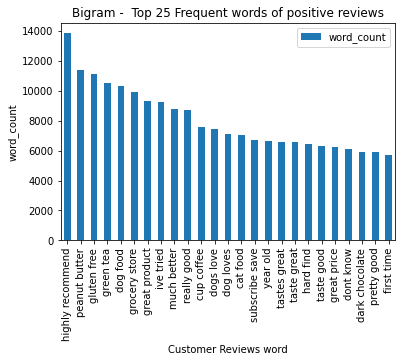

In [44]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["Customer Reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["Customer Reviews", "word_count"]
#print(fd_sorted.head(25))
fd_sorted.head(25).plot(x="Customer Reviews", y="word_count",kind="bar")
plt.title("Bigram -  Top 25 Frequent words of positive reviews")
plt.xlabel("Customer Reviews word")
plt.ylabel("word_count")

# Step : 4.2.2.Frequent words of negative reviews

Text(0, 0.5, 'word_count')

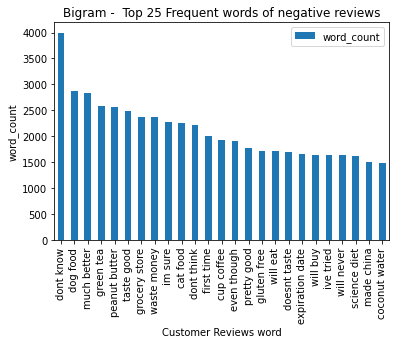

In [45]:
## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Customer Reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["Customer Reviews", "word_count"]
#print(fd_sorted.head(25))
fd_sorted.head(25).plot(x="Customer Reviews", y="word_count",kind="bar")
plt.title("Bigram -  Top 25 Frequent words of negative reviews")
plt.xlabel("Customer Reviews word")
plt.ylabel("word_count")


#Step 4.3 - Trigram analysis - Let's plot most frequent three word in reviews based on sentiments


# Step : 4.3.1.Frequent words of positive reviews

Text(0, 0.5, 'word_count')

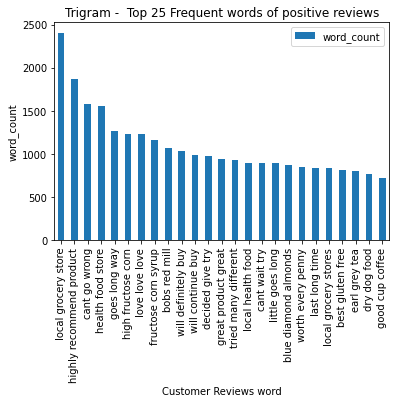

In [46]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["Customer Reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["Customer Reviews", "word_count"]
#print(fd_sorted.head(25))
fd_sorted.head(25).plot(x="Customer Reviews", y="word_count",kind="bar")
plt.title("Trigram -  Top 25 Frequent words of positive reviews")
plt.xlabel("Customer Reviews word")
plt.ylabel("word_count")

Empty DataFrame
Columns: [ProductId, UserId, ProfileName, Score, Customer Reviews, Review date, Year, Month, Positive, Negative, Neutral, sentiment_score, sentiment, polarity, review_len, word_count]
Index: []
                           0    1
0             will never buy  673
1           dont waste money  642
2         high fructose corn  628
3        local grocery store  618
4        fructose corn syrup  552
5              day cup total  398
6              got bad batch  367
7          health food store  281
8               will go back  268
9          doesnt taste good  268
10          dont really care  266
11           thought id give  258
12          will never order  257
13             two weeks ago  252
14     first two ingredients  244
15            thought id try  244
16            dont think ill  233
17           dont think will  231
18              now im stuck  225
19          corn gluten meal  223
20           three times day  217
21  ingredients science diet  216
22      

Text(0, 0.5, 'word_count')

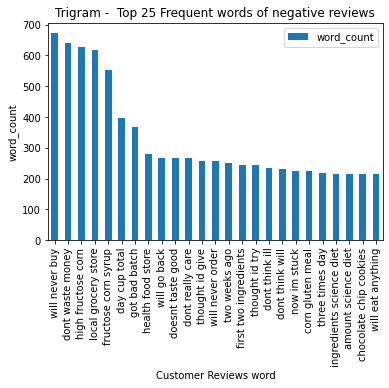

In [47]:
## Get the bar chart from negative reviews ##
print(review_neu.head(25))
freq_dict = defaultdict(int)
for sent in review_neg["Customer Reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
print(fd_sorted.head(25))
fd_sorted.columns = ["Customer Reviews", "word_count"]

fd_sorted.head(25).plot(x="Customer Reviews", y="word_count",kind="bar")
plt.title("Trigram -  Top 25 Frequent words of negative reviews")
plt.xlabel("Customer Reviews word")
plt.ylabel("word_count")

# Step:5.Customer Segmentation Using RFM Analysis

In [48]:
result = clean_review[~clean_review.UserId.str.startswith(('#oc-'))]
print ("The shape of the  data is (row, column):"+ str(df.shape))

The shape of the  data is (row, column):(568411, 13)


In [49]:
seg_map = {5: 'Champions',
             4: 'Loyal Customers',
             3: 'Need Attention',
             2: 'At Risk',
           1: 'About Leaving'}

In [50]:
result['Segment'] = result['Score'].replace(seg_map, regex=True)
#result2.reset_index(inplace=True)
result.head()

,ProductId,UserId,ProfileName,Score,Customer Reviews,Review date,Year,Month,Positive,Negative,Neutral,sentiment_score,sentiment,polarity,review_len,word_count,Segment
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,good quality dog foodi have bought several of ...,2011-04-27,2011,4,0.323,0.000,0.677,1,POSITIVE,0.485714,281,51,Champions
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,not as advertisedproduct arrived labeled as ju...,2012-09-07,2012,9,0.000,0.131,0.869,0,NEGATIVE,-0.033333,200,33,About Leaving
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,delight says it allthis is a confection that h...,2008-08-18,2008,8,0.151,0.088,0.761,1,POSITIVE,0.133571,510,95,Loyal Customers
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2,cough medicineif you are looking for the secre...,2011-06-13,2011,6,0.000,0.000,1.000,0,NEGATIVE,0.166667,228,42,At Risk
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,great taffygreat taffy at a great price there...,2012-10-21,2012,10,0.435,0.000,0.565,1,POSITIVE,0.483333,146,28,Champions


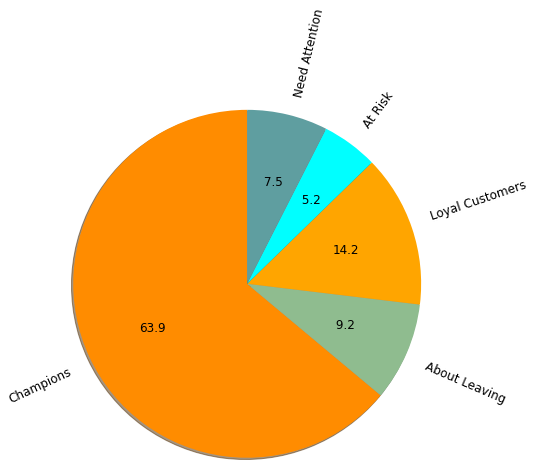

In [51]:
colors  = ("darkorange", "darkseagreen", "orange", "cyan", "cadetblue", "hotpink", "lightsteelblue", "coral",  "mediumaquamarine","palegoldenrod")
explodes = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

result["Segment"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 12}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True
                                                 )
plt.ylabel("");

Step :6. Model Building: Sentiment Analysis

In [52]:
# Train test split

#encode the taget variable [sentiment]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(clean_review['sentiment'])
clean_review['sentiment_encoded'] = le.transform(clean_review['sentiment'])
clean_review.head()



,ProductId,UserId,ProfileName,Score,Customer Reviews,Review date,Year,Month,Positive,Negative,Neutral,sentiment_score,sentiment,polarity,review_len,word_count,sentiment_encoded
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,good quality dog foodi have bought several of ...,2011-04-27,2011,4,0.323,0.000,0.677,1,POSITIVE,0.485714,281,51,1
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,not as advertisedproduct arrived labeled as ju...,2012-09-07,2012,9,0.000,0.131,0.869,0,NEGATIVE,-0.033333,200,33,0
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,delight says it allthis is a confection that h...,2008-08-18,2008,8,0.151,0.088,0.761,1,POSITIVE,0.133571,510,95,1
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2,cough medicineif you are looking for the secre...,2011-06-13,2011,6,0.000,0.000,1.000,0,NEGATIVE,0.166667,228,42,0
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,great taffygreat taffy at a great price there...,2012-10-21,2012,10,0.435,0.000,0.565,1,POSITIVE,0.483333,146,28,1


In [53]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectorizedData, clean_review['sentiment_encoded'], 
                                                    test_size=0.33, random_state=42)

In [54]:
# Model Fit
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [55]:

# Model evaluation
from sklearn.metrics import classification_report
preds = clf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77     40859
           1       0.91      0.99      0.95    146717

    accuracy                           0.92    187576
   macro avg       0.93      0.82      0.86    187576
weighted avg       0.92      0.92      0.91    187576



In [59]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format((clf.score(X_test, y_test))))

Accuracy of logistic regression classifier on test set: 0.92


In [60]:
y_pred = clf.predict(X_test)

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Step : 7.Classification metrics & F1-Score

Confusion matrix, without normalization


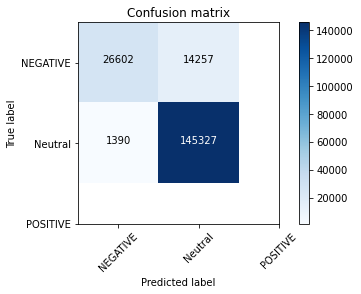

In [62]:
#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['NEGATIVE','Neutral','POSITIVE'])

In [63]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.65      0.77     40859
           1       0.91      0.99      0.95    146717

    accuracy                           0.92    187576
   macro avg       0.93      0.82      0.86    187576
weighted avg       0.92      0.92      0.91    187576

